### import data

In [1]:
from pathlib import Path
import requests

In [2]:
DATA_PATH = Path('data')
PATH = DATA_PATH / "MNIST"

In [3]:
PATH.mkdir(parents=True, exist_ok=True)

In [4]:
URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

In [5]:
if not (PATH/FILENAME).exists():
    content = requests.get(URL+FILENAME).content
    (PATH / FILENAME).open('wb').write(content)

### extract data

In [6]:
import pickle
import gzip

In [7]:
with gzip.open((PATH/FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

### view data

In [8]:
from matplotlib import pyplot

In [9]:
import numpy as np

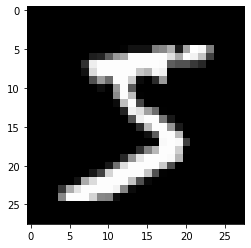

In [10]:
pyplot.imshow(x_train[0].reshape((28,28)), cmap='gray')

In [11]:
x_train.shape

(50000, 784)

### Pytorch 

In [12]:
import torch

In [13]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [14]:
n, c = x_train.shape

In [15]:
print(x_train, x_train.shape, y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) torch.Size([50000, 784]) tensor(0) tensor(9)


In [16]:
import math

### weights and biases

In [17]:
weights = torch.randn(784, 10) / math.sqrt(784)

In [18]:
torch.randn(784, 10)

tensor([[-1.0341,  2.5876, -0.4008,  ..., -0.3082, -0.0928,  1.0330],
        [ 0.7783,  0.3371,  0.3055,  ..., -0.3977,  0.4719,  0.7729],
        [-1.1114,  1.6694,  0.1020,  ...,  0.8942, -1.1908, -1.4654],
        ...,
        [-0.6027,  2.0697,  0.2814,  ..., -0.2933,  1.2229,  0.2101],
        [ 1.1713, -0.1544,  0.3342,  ...,  1.9097, -0.3216,  1.1001],
        [-0.5268, -0.7320, -0.7166,  ..., -0.0765, -0.8149,  0.0744]])

In [19]:
weights

tensor([[ 0.0501, -0.0458,  0.0951,  ..., -0.0146, -0.0022, -0.0381],
        [-0.0066,  0.0568,  0.0044,  ..., -0.0656,  0.0032, -0.0486],
        [-0.0210, -0.0045,  0.0317,  ...,  0.0475, -0.0289, -0.0102],
        ...,
        [-0.0033,  0.0109, -0.0232,  ...,  0.0580,  0.0176,  0.0130],
        [ 0.0434,  0.0276, -0.0396,  ...,  0.0051, -0.0613, -0.0060],
        [ 0.0344, -0.0330,  0.0222,  ...,  0.0720,  0.0347,  0.0264]])

In [20]:
weights.requires_grad_()

tensor([[ 0.0501, -0.0458,  0.0951,  ..., -0.0146, -0.0022, -0.0381],
        [-0.0066,  0.0568,  0.0044,  ..., -0.0656,  0.0032, -0.0486],
        [-0.0210, -0.0045,  0.0317,  ...,  0.0475, -0.0289, -0.0102],
        ...,
        [-0.0033,  0.0109, -0.0232,  ...,  0.0580,  0.0176,  0.0130],
        [ 0.0434,  0.0276, -0.0396,  ...,  0.0051, -0.0613, -0.0060],
        [ 0.0344, -0.0330,  0.0222,  ...,  0.0720,  0.0347,  0.0264]],
       requires_grad=True)

In [21]:
bias = torch.zeros(10, requires_grad=True)

In [22]:
bias.shape

torch.Size([10])

### activation fn

In [23]:
def log_softmax(x):
    """
    Mathematically, 
        log_softmax(xi) = log(exp(xi)/exp(x).sum())
        AND
        log(a/b) = log(a) - log(b)
    """
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [24]:
x_train[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [25]:
log_softmax(x_train[0:3])

tensor([[-6.8610, -6.8610, -6.8610,  ..., -6.8610, -6.8610, -6.8610],
        [-6.8844, -6.8844, -6.8844,  ..., -6.8844, -6.8844, -6.8844],
        [-6.8022, -6.8022, -6.8022,  ..., -6.8022, -6.8022, -6.8022]])

In [29]:
def model(xb):
    return log_softmax(xb @ weights + bias)

In [30]:
bs = 64
xb = x_train[0:bs]
preds = model(xb)
print(preds[0], preds.shape)

tensor([-2.0888, -2.3284, -2.7144, -1.9727, -2.1098, -2.6046, -2.1376, -2.6959,
        -2.2108, -2.4870], grad_fn=<SelectBackward>) torch.Size([64, 10])


### loss fn

In [32]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [33]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.2799, grad_fn=<NegBackward>)


### accuracy

In [34]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [123]:
accuracy(preds, y_b)

tensor(0.0625)

### training 

In [36]:
from IPython.core.debugger import set_trace

In [37]:
lr = 0.5
epochs = 2

In [48]:
for epoch in range(epochs):
    # n = x_train.shape[0], here n = 50000
    for i in range( (n-1) //bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [49]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))
# Note: loss decreases and accuracy increases

tensor(0.0572, grad_fn=<NegBackward>) tensor(1.)
